# Predicting twitter sentiment using neural networks

<font color=blue>Artificial intellegence coursework 1     | by Izzy Stewart</font>

In this project I am using the chosen dataset to build a neural network and investigate different hyper-parameter settings to optimize its performance. I wanted to explore my interest in natural language processing and how successful a neural network can be predicting the sentiment of a text based dataset. With this in mind I found an interesting dataset from Kaggle that took tweets that used the hashtag from the Republican GOP debate in 2016. Contributors to the dataset were asked if each tweet had a positive, negative or neutral tone and the result was then stored in the variable 'sentiment.' I thought using tweets from a debate like this would be an interesting experiment for a neural network where many people have very strong opinions, which would come through in the words contained in the tweet data.

<img src="images/gop-debate-candidates.jpg" width="600" align=left>

Image taken from GOP debate.

#### The problem type
The sentiment analysis problem I am using is defined as a multiclass single label classification problem. This means there are multiple classes (positive, negative and neutral sentiment) but each observation (tweet) can only belong to one of those classes.  

#### Hypothesis
My hypothesis for this project is that the sentiment of the tweets in the given dataset can be predicted with an accuracy rate better than 50%. Once this hypothesis is acheived I want to tune optimize the model and its hyper-parameter settings in order to improve the accuracy rate.

#### Success metric 
Accuracy rate of the model on the test data.

#### Evaluation protocol
A hold out validation set taken from the training data

The dataset provides many more variables other than tweet and sentiment, but for the purpose of this project I am going to ignore them. It is worth remembering that the sentiment of each tweet was decided by contributors to the dataset. This means, in a sense, the neural network I build will be learning to predict the contributors opinion of the tweets sentiment, which might not be everyones view of the sentiment. However I think this still provides an interesting platform for analysis.

<img src="images/csv_image.png" width="600" align=left>

Image of original dataset in csv format.

## Preprocessing

Some of the datasets from Keras come already in the correct format but as this dataset is taken from kaggle in csv format, before running the data through any models some preprocessing needs to take place. For the neural networks we are interested in using, the input data needs to be in both tensor format and integer values 0 and 1. To use our sentiment dataset the following preprocessing tasks are needed:

1. Remove un-needed columns and split into input and labels (tweets and sentiment)
2. Transform the sentiment data into integer values and then into arrays of values 0 or 1 using one-hot encoding
3. Transform each word in the tweet data into numbered values corresponding to a dictionary of words
4. Transform the integer lists into correct tensor format using vectorise function
5. Split the data into training-validation-test datasets (shuffled)

In the cells below I run through the above steps and provide details of what was done at each stage. Many of the functions I have created make use of the keras preprocessing module, which I found really useful. I also used sklearn tools for splitting the training/validation and test data as well as to shuffle these datasets in unision. For the full code used, see the preprocessing py file I created. 

#### Import modules and read in data

The first step was to import the modules needed. Many of the modules needed for the preprocessing stage are imported inside the 'preprocessing' module created for this project. I have kept all preprocessing functions and classes inside this module to help keep this report clean and makes is easier to display the results. 

In [1]:
# Importing modules needed for analysis.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
from keras import regularizers
from keras import optimizers

# Importing created .py files
import preprocessing as pre

Using TensorFlow backend.


In [2]:
# Using the preprocess module we can read in the two files as arrays.
sentiment_list = pre.read_csv('data/GOP_sentiment.csv','sentiment')
tweet_list = pre.read_csv('data/GOP_sentiment.csv','text')
# As a test I have printed the first tweet in the dataset along with its assigned sentiment class.
print("Tweet: ", tweet_list[0])
print("Class: ", sentiment_list[0])

Tweet:  RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate
Class:  Neutral


In [3]:
# Shuffling the data to ensure randomness.
sentiment_list, tweet_list = shuffle(sentiment_list, tweet_list, random_state=0)
# Read in the text_to_words function inside preprocessing and assigning to 'tweet_list' variable.
tweet_list = pre.text_to_words(tweet_list)
# Calling the above function to seperate each word in the tweet as its own item.
sentiment_list = pre.text_to_words(sentiment_list)
# Printing the same tweet and sentiment as above but now in word list format.
print(tweet_list[0])
print(sentiment_list[0])

['rt', 'nochristie16', 'chrischristie', 'blasts', 'sanctuary', 'cities', 'then', 'finds', 'he', 'has', 'four', 'under', 'his', 'own', 'nose', 'in', 'nj', 'gopdebate', 'fail', 'foxnews', 'http', '…']
['negative']


#### Get sentiment labels into correct format

Both the input data and class labels need to be in the correct format to feed into a neural network. For the network type we plan to use (multiclass, single label class) we need both datasets in tensor format. In the cells below you can see the steps taken to transform the sentiment labels into this format.

In [4]:
# Read in the format labels class from the preprocessing module.
format_labels = pre.FormatLabels(sentiment_list)

In [5]:
# Calling the 'text to num' function from the format labels class.
sentiment_labels = format_labels.text_to_num()
# Outputting the first label in number format.
sentiment_labels[0]

0

In [6]:
# Calling the 'one_hot' function from the format labels class.
y_values = format_labels.one_hot(sentiment_labels)
# Outputting the first label in tensor format.
y_values[0]

array([1., 0., 0.], dtype=float32)

#### Create word list

Transforming the tweets into tensor format was a little more tricky than the class labels. Before applying any transformations on the tweet data, I needed to create a word list from every word that appears in the array of tweets more than once. I will then be able to use this word list to assign the words in the tweets to the index number of the word list. I chose to only use words that appear more than once to remove random, one-off words that will not be useful for analysis.

In [7]:
# Calling the create word list class from the preprocessing module.
create_word_list = pre.CreateWordList()
tweet_word_list = create_word_list.word_list(tweet_list) # Can take a few minutes
tweet_word_list[0:2]

['linkedin', 'tanned']

#### Get tweets into correct format

Once the word list has been created I then used this list to loop through the tweets updating each word with the corresponding number. After that I used a vectorise function to transform the numbered lists into tensors with all zeros except where the word is ordered where there is a one.

In [8]:
# Reading in the 'FormatTweetList' class from the preprocessing module.
format_tweet_list = pre.FormatTweetList()

In [9]:
# Calling the 'tweet_encode' function from the format tweet list class. 
tweet_num_list = format_tweet_list.tweet_encode(tweet_list, tweet_word_list) # Can take up to five minutes.

In [10]:
# Printing the first tweet in the array with each word now in number format.
print(tweet_num_list[0])

[7858, 3279, 2083, 4416, 7861, 5870, 3999, 46, 5160, 6819, 6060, 6370, 2901, 3966, 508, 7149, 29, 7687, 498, 489, 3623, 1883]


In [11]:
# Calling the 'vectorize_sequence' function from the format tweet list class.
x_values = format_tweet_list.vectorize_sequences(tweet_num_list)

In [12]:
# Outputting the resulting tensor.
x_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Split data for training and testing

Now the input and class data is ready in the correct format I need to split into sepeerate datasets for training, validating and testing. The reason we need a validation set is so we can improve our models without learning from the test set (which should remain unknown and only be used for reporting and evaluating our final model). I chose to split the data 80 / 20 training and testing and then 80 / 20 again training and validation sets. This was taken from best practice suggestions where the need for the training set to be as large as possible for improving the model is highlighted.

I decided not use k-fold or iterated k-fold in this project for two reasons. Firstly, with over 13,800 tweets, this dataset is not small enough to necessarily suffer from statistically underrepresenting the data like the boston housing dataset. I was also aware that applying techniques such as k-fold or iterated k-fold with shuffling would require more computational power meaning the models would take longer to run. As this project requires alot of testing/ tuning of hyperparameters I decided to save time and take the hit on not using these methods. I will take this into account when I evaluate the test results.

In [21]:
# Splitting data training and testing 80 / 20, then 80 / 20 training and validation
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

# Print the size of each set.
print("x train:", len(x_train))
print("x test:", len(x_test))
print("x val:", len(x_val))
print("y train:", len(y_train))
print("y test:", len(y_test))
print("y val:", len(y_val))

x train: 8876
x test: 2775
x val: 2220
y train: 8876
y test: 2775
y val: 2220


## Model training

Now the processing is complete and the data is divided into the correct training / validation and test sets, we are ready to train on our neural network models. As previously mentioned, we want to build a model for a multi-class binary label problem. This means the output layer has more than one class (positive, negative and neutral) but each tweet can only be one of these classes. As previously mentioned, I am using the universal workflow for this project. So with this in mind, in this stage I am looking to:

1. Acheive a model that is better than a baseline
2. Scale up this model
3. Regulise and tune down this model

In the process of steps 2 and 3 I will be testing different variations of hyper-parameter settings to try and best optimize my model. This involves repeatedly training my model and then testing on the evaluation set. For each test performed, I will run the best performing model on the test set and record the results. However, at no point in this process will I use the test results to influence my training / tuning of the hyper-paramter settings. This is important as the test set, as far as possible should remain hidden to the model as learning of the test set will lead to bias results where the model overfits to that particular test set.

In [22]:
# Import modules needed for model building / training.
from keras import models
from keras import layers
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

#### Model functions

The functions below allow me to test different hyperparameters without having to write the code to build the models multiple times. The first function builds a model and the second fits it and collects the needed loss and accuracy results on both the training a validation sets. I have left the optimizer as rmsprop (I will test variations of the learning rate later) and the loss as categorical crossentropy (as suggested for a multiclass single label problem).

In [23]:
# Function to build a neural network model where you input your desired hyperparameters.
def build_model(neuron_num, layer_num, drop_num):
    model = models.Sequential()
    # The input layer is added here where the activation is relu and the shape is 7995 (tensor size).
    model.add(layers.Dense(neuron_num, activation = 'relu', input_shape = (7995,)))
    # A for loop to add the number of layers described above.
    for x in range(0, layer_num):
        model.add(layers.Dense(neuron_num, activation = 'relu'))
        model.add(layers.Dropout(drop_num))
    # The output layer is three neurons for each positive, negative and neutral class.
    model.add(layers.Dense(3, activation = 'softmax'))
    # Setting optimizer, loss function and metrics to collect.
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [24]:
def model_fit(model,x,y,x_val,y_val,epoch,batch):
    # Setting the metric variables to 'global' so I can use outside the program.
    global val_loss, loss, acc, val_acc
    # Printing line to show reader program has started.
    print("In progress: Model fitting to train and testing on validation.")
    # Fitting model and assigning to 'history' variable.
    history = model.fit(x,
                        y,
                        epochs = epoch,
                        batch_size = batch,
                        validation_data = (x_val, y_val),
                        # Set to zero to avoid too much text outputted.
                        verbose = 0)
    # Printing line to show program has finished.
    print("Finished. Model trained, and tested on the validation set.")
    # Collecting loss and accuracy metrics in list format.
    val_loss = history.history['val_loss']
    loss = history.history['loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']

### Achieving a baseline model

Our first step is to develop a model that underfits but has statistical power. Using the two functions above I trained a model with two layers and five neurons per layer. This is trained on 28 epochs. As you can see below overfitting began at 12 epochs. I then retrain a new model with the same parameters and the optimum epoch number to evaluate on the test set. It is important to do this on a new model to acheive an unbiased result.  

In [134]:
# Building model with two hidden layers and five neurons per hidden layer.
model = build_model(5,2,0)
# Fitting above model to train set up to 28 epochs and 512 batch sizes.
model_fit(model, x_train, y_train ,x_val, y_val, 28, 512)

In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


In [135]:
# Printing summary which gives an overview of each hidden layers. As you can see dropout is set to zero.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_317 (Dense)            (None, 5)                 39980     
_________________________________________________________________
dense_318 (Dense)            (None, 5)                 30        
_________________________________________________________________
dropout_225 (Dropout)        (None, 5)                 0         
_________________________________________________________________
dense_319 (Dense)            (None, 5)                 30        
_________________________________________________________________
dropout_226 (Dropout)        (None, 5)                 0         
_________________________________________________________________
dense_320 (Dense)            (None, 3)                 18        
Total params: 40,058
Trainable params: 40,058
Non-trainable params: 0
_________________________________________________________________


In [136]:
# Running argmin to see where overfitting begins.
print("Overfitting begins at ", np.argmin(val_loss) + 1, " epochs.")

Overfitting begins at  12  epochs.


In [138]:
# Building new model on optimum number of epochs.
model = build_model(5,2,0)
model_fit(model, x_train, y_train ,x_val, y_val, 12, 512)

In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


In [139]:
# Returns the loss value & metrics values for the model in test mode.
test_results = model.evaluate(x_test, y_test)
test_results

2775/2775 [==============================] - 1s 249us/step


[0.758725174311045, 0.6742342340194427]

The test results show a loss of 0.76 and an accuracy of 0.67. To decide if this model has statistical power we need to decide what our baseline is. For the purpose of this project I am setting the baseline to be better than 50%, as lower than 50% is worse than random guessing. As 0.62 accuracy is higher than 50% (0.5) we can say this model has statistical power.

### Scaling up

After acheiving a baseline model with statistical power, the next step is to experiment with different hyper-parameters to scale up the model, reaching the point where is overfits the data. Once this overfitting has started we can then apply the next step to regulize and tune the model down to its optimum state.

When testing different hyperparameters its important to keep in mind the statistical uncertainty of these settings. Machine learning models are rarely or even never a perfect representation of the observations and this is partly due to the massive ammount of different possible hyperparamter combinations. With this in mind, I am choosing a set of fixed values hyperparemeter values and will test the model on each of these values. This insures a thorough test at different hyperparmeter settings. With more time I would have liked to take this further using the grid search method where you can optimize the paramters by searching through a manually specified subset of the hyperparameter space.

To scale up the model I will first test variations of the number of hidden layers and the number of neurons within it. In the same vein as the grid search method, I will use a set number of neurons per hidden layer in each test, for example for testing two layers I will test 5,5 then 10,10 ect number of neurons. The function below loops through the training model functions above testing four different options for the number of neurons per layer. The first number is five (the same as the baseline) and the highest is forty. I then run this on 2, 4, 8 and 16 layers. I have kept all other parameters the same to make it a fair test.

In [30]:
# Creating a list 'neuron_num' to define the number of neurons per layer to test training each model on.
neuron_num = [5, 10, 20, 40]

# Function created to loop through the neuron_num list and train a new model on each item in that list.
def test_layer_size(neuron_num, layer_num):
    # Setting global variables to use outside the function.
    global val_loss_list, train_loss_list, val_acc_list, train_acc_list
    val_loss_list = []
    train_loss_list = []
    val_acc_list = []
    train_acc_list = []
    # For loop to build i number of models using i number of neurons per layer.
    for i in range(len(neuron_num)):
        # Printing line to show which neuron number is being used in each model train.
        print("Training with layer size: ", neuron_num[i])
        mod = build_model(neuron_num[i], layer_num,0)
        # Fitting model.
        model_fit(mod, x_train, y_train ,x_val, y_val, 28, 512)
        # Append loss and accuracy metrics to lists.
        val_loss_list.append(val_loss)
        train_loss_list.append(loss)
        val_acc_list.append(val_acc)
        train_acc_list.append(acc)

In [31]:
# Testing with two hidden layers
test_layer_size(neuron_num, 2)
# Assigning metrics to new variables (for reporting later).
train_loss_2 = train_loss_list
val_loss_2 = val_loss_list
val_acc_2 = val_acc_list
train_acc_2 = train_acc_list

Training with layer size:  5
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with layer size:  10
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with layer size:  20
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with layer size:  40
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


In [32]:
# Testing with four hidden layers
test_layer_size(neuron_num, 4)
# Assigning metrics to new variables (for reporting later).
train_loss_4 = train_loss_list
val_loss_4 = val_loss_list
val_acc_4 = val_acc_list
train_acc_4 = train_acc_list

Training with layer size:  5
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with layer size:  10
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with layer size:  20
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with layer size:  40
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


In [33]:
# Testing with eight hidden layers
test_layer_size(neuron_num, 8)
# Assigning metrics to new variables (for reporting later).
train_loss_8 = train_loss_list
val_loss_8 = val_loss_list
val_acc_8 = val_acc_list
train_acc_8 = train_acc_list

Training with layer size:  5
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with layer size:  10
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with layer size:  20
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with layer size:  40
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


In [34]:
# Testing with sixteen hidden layers
test_layer_size(neuron_num, 16)
# Assigning metrics to new variables (for reporting later).
train_loss_16 = train_loss_list
val_loss_16 = val_loss_list
val_acc_16 = val_acc_list
train_acc_16 = train_acc_list

Training with layer size:  5
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with layer size:  10
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with layer size:  20
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with layer size:  40
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


##### Plotting the results. 

The plots below depict the training and validation loss respectively for each of the five models for each layer size. As a reminder, to optimize the models I am using the validation loss rather than accuracy to define the models suceess on the validation set. 

In [35]:
# Function to plot the validation or training metrics for a set of model paramters.
def plot_models(metrics_list, labels_list, ylabel, title):
    colors = ['b','r','g','y','m']
    epochs = range(1, len(train_loss_list[0]) + 1)
    for i in range(len(metrics_list)):
        plt.plot(epochs, metrics_list[i], colors[i], label=labels_list[i])
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend() 
    plt.show()    

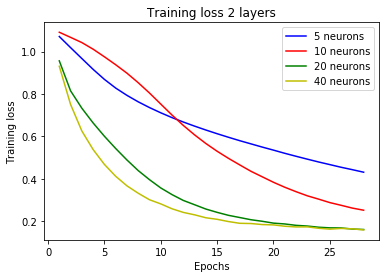

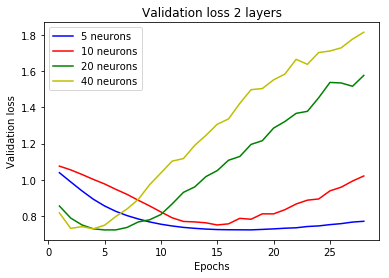

In [36]:
# Plotting the results where there are two hidden layers.
labels_list = ['5 neurons','10 neurons','20 neurons','40 neurons']
plot_models(train_loss_2, labels_list, "Training loss", "Training loss 2 layers")
plot_models(val_loss_2, labels_list, "Validation loss", "Validation loss 2 layers")

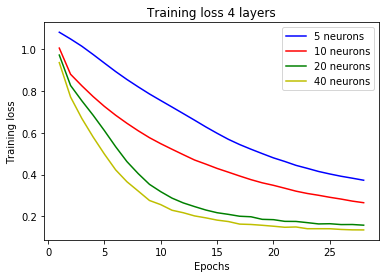

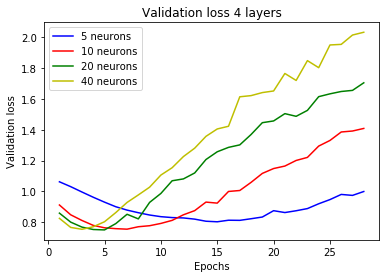

In [43]:
# Plotting the results where there are four hidden layers.
plot_models(train_loss_4, labels_list, "Training loss", "Training loss 4 layers")
plot_models(val_loss_4, labels_list, "Validation loss", "Validation loss 4 layers")

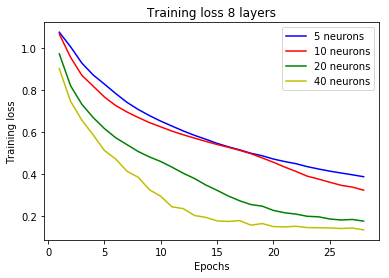

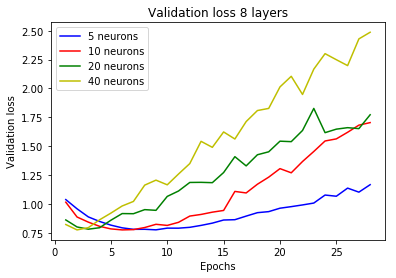

In [50]:
# Plotting the results where there are eight hidden layers.
plot_models(train_loss_8, labels_list, "Training loss", "Training loss 8 layers")
plot_models(val_loss_8, labels_list, "Validation loss", "Validation loss 8 layers")

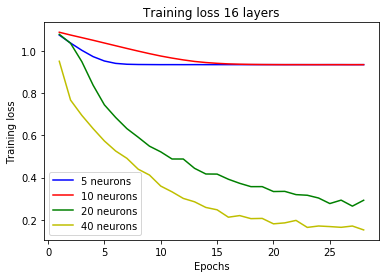

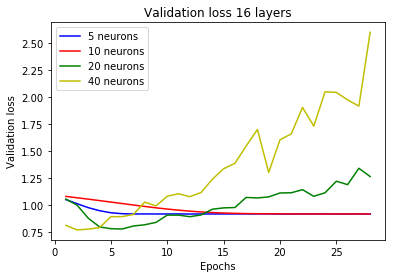

In [57]:
# Plotting the results where there are sixteen hidden layers.
plot_models(train_loss_16, labels_list, "Training loss", "Training loss 16 layers")
plot_models(val_loss_16, labels_list, "Validation loss", "Validation loss 16 layers")

As you can see from the plots above all models follow a similar pattern where the loss on the training set will just keep going down whereas the loss on the validation set will decrease to a certain number of epochs, and then start increasing. This is where the model has started to overfit to the training data. Looking at the validation loss plots I notice a few patterns:

1. As the number of neurons per hidden layer increase, overfitting tends to happen faster and more rapidly. This is likely due to the hidden layers being too large and so over learning from the training data more quickly. 
2. As the number of neurons per hidden layer increase, the lines become less smooth. This could again be due to the larger layers learning more complex patterns in the training data, which can cause the loss to go up and down more rapidly at each epoch run.
3. As the number of layers increase, overfitting overall seems to happen faster. As with the size of the layers, increasing the number of layers can give the model more power to find more patterns in the training data, which can lead to overfitting.

With the above plots it is difficult to see which layer size and layer number combination performed best and to compare where overfitting starts. That is why in the next cell I collect where overfitting begins at each model run along with the lowest validation loss score.

In [68]:
# Checking where overfitting begins for each variation.
print("2 layers, 5 neurons per hidden layer: ", np.argmin(val_loss_2[0]) + 1)
print("2 layers, 10 neurons per hidden layer: ", np.argmin(val_loss_2[1]) + 1)
print("2 layers, 20 neurons per hidden layer: ", np.argmin(val_loss_2[2]) + 1)
print("2 layers, 40 neurons per hidden layer: ", np.argmin(val_loss_2[3]) + 1)
print("4 layers, 5 neurons per hidden layer: ", np.argmin(val_loss_4[0]) + 1)
print("4 layers, 10 neurons per hidden layer: ", np.argmin(val_loss_4[1]) + 1)
print("4 layers, 20 neurons per hidden layer: ", np.argmin(val_loss_4[2]) + 1)
print("4 layers, 40 neurons per hidden layer: ", np.argmin(val_loss_4[3]) + 1)
print("8 layers, 5 neurons per hidden layer: ", np.argmin(val_loss_8[0]) + 1)
print("8 layers, 10 neurons per hidden layer: ", np.argmin(val_loss_8[1]) + 1)
print("8 layers, 20 neurons per hidden layer: ", np.argmin(val_loss_8[2]) + 1)
print("8 layers, 40 neurons per hidden layer: ", np.argmin(val_loss_8[3]) + 1)
print("16 layers, 5 neurons per hidden layer: ", np.argmin(val_loss_16[0]) + 1)
print("16 layers, 10 neurons per hidden layer: ", np.argmin(val_loss_16[1]) + 1)
print("16 layers, 20 neurons per hidden layer: ", np.argmin(val_loss_16[2]) + 1)
print("16 layers, 40 neurons per hidden layer: ", np.argmin(val_loss_16[3]) + 1)

# Collecting the overfit and validation loss metrics for best performing model in each neuron number.
overfit_2 = [18, 15, 5, 4]
val_loss_score_2 = [0.7241528559375454, 0.7512412633981791, 0.723956831296285, 0.7299792775162706]
overfit_4 = [15, 7, 5, 3]
val_loss_score_4 = [0.8027667635195964, 0.7547778351886852, 0.750003974072568, 0.7540187303010408]
overfit_8 = [9, 6, 3, 2]
val_loss_score_8 = [0.7752577793490779, 0.7746045615222003, 0.7808848867545257, 0.7745506008466084]
overfit_16 = [25, 24, 6, 2]
val_loss_score_16 = [0.9175237576166789, 0.9179087576565442, 0.7783206843041085, 0.770075011253357]

2 layers, 5 neurons per hidden layer:  18
2 layers, 10 neurons per hidden layer:  15
2 layers, 20 neurons per hidden layer:  5
2 layers, 40 neurons per hidden layer:  4
4 layers, 5 neurons per hidden layer:  15
4 layers, 10 neurons per hidden layer:  7
4 layers, 20 neurons per hidden layer:  5
4 layers, 40 neurons per hidden layer:  3
8 layers, 5 neurons per hidden layer:  9
8 layers, 10 neurons per hidden layer:  6
8 layers, 20 neurons per hidden layer:  3
8 layers, 40 neurons per hidden layer:  2
16 layers, 5 neurons per hidden layer:  25
16 layers, 10 neurons per hidden layer:  24
16 layers, 20 neurons per hidden layer:  6
16 layers, 40 neurons per hidden layer:  2


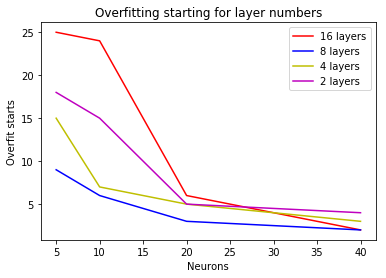

In [69]:
# x-axis neuron size per layer. 
neurons = [5,10,20,40]

# Plotting where overfitting starts for each test on the validation set.
plt.plot(neurons, overfit_16, "r", label="16 layers")
plt.plot(neurons, overfit_8, "b", label="8 layers")
plt.plot(neurons, overfit_4, "y", label="4 layers")
plt.plot(neurons, overfit_2, "m", label="2 layers")
plt.xlabel('Neurons')
plt.ylabel("Overfit starts")
plt.title("Overfitting starting for layer numbers")
plt.legend() 
plt.show()

The plot above depicts where overfitting begins for each neuron number within each layer size. It is intersting to see that, with the acception of the 16 layer models, overfitting starts earlier as the number of layers and neurons per layer increase. Those results are expected as the models are likely learning too many patterns in the training set. 

However, at five and ten neurons per layer overfitting took alot longer (more epochs) on the 16 layer model, than the models with less numbers of layers. My instinct here is where there are so few neurons per layer the model picked up less information at each layer which led to overfitting taking longer. As the number of neurons per layer reaches greater than 20, the 16 layer models overfit faster, overtaking the other models.

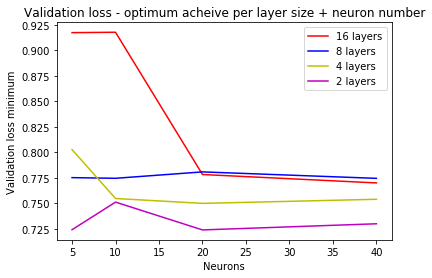

In [70]:
# x-axis neuron size per layer. 
neurons = [5,10,20,40]

# Plotting the lowest validation loss acheived on each neuron number and layer number test.
plt.plot(neurons, val_loss_score_16, "r", label="16 layers")
plt.plot(neurons, val_loss_score_8, "b", label="8 layers")
plt.plot(neurons, val_loss_score_4, "y", label="4 layers")
plt.plot(neurons, val_loss_score_2, "m", label="2 layers")
plt.xlabel('Neurons')
plt.ylabel("Validation loss minimum")
plt.title("Validation loss - optimum acheive per layer size + neuron number")
plt.legend() 
plt.show()

This plot depicts the lowest validation scores acheived across all tests on the validation set. As you can see the best score was acheived using just two hidden layers and 20 neurons per layer. The worst result in this group is acheived from the 16 layer model with ten neurons per layer. Its interesting to see the eight layer models remain quite stable across all neuron sizes.

##### Build new models to predict on test set.

I will now build four new models using the parameters of the best validation result for each layer size. I then record the results of the loss and accuracy on the test set for reporting later.

In [73]:
# Building new models on optimum number of epochs/ neurons per layer.

# Two hidden layers
model_l2 = build_model(20,2,0)
model_fit(model_l2, x_train, y_train ,x_val, y_val, 5, 512)

# Four hidden layers
model_l4 = build_model(20,4,0)
model_fit(model_l4, x_train, y_train ,x_val, y_val, 5, 512)

# Eight hidden layers
model_l8 = build_model(40,8,0)
model_fit(model_l8, x_train, y_train ,x_val, y_val, 2, 512)

# Sixteen hidden layers
model_l16 = build_model(40,16,0)
model_fit(model_l16, x_train, y_train ,x_val, y_val, 2, 512)

In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


In [74]:
# Returns the loss value & metrics values for the models in test mode.
test_results_l2 = model_l2.evaluate(x_test, y_test)
print("Two layers: ", test_results_l2)
test_results_l4 = model_l4.evaluate(x_test, y_test)
print("Four layers: ", test_results_l4)
test_results_l8 = model_l8.evaluate(x_test, y_test)
print("Eight layers: ", test_results_l8)
test_results_l16 = model_l16.evaluate(x_test, y_test)
print("Sixteen layers: ", test_results_l16)

2775/2775 [==============================] - 1s 483us/step
Two layers:  [0.7248006409352964, 0.6926126126340918]
2775/2775 [==============================] - 1s 468us/step
Four layers:  [0.7704620150617651, 0.672792792814272]
2775/2775 [==============================] - 2s 819us/step
Eight layers:  [0.777293095159101, 0.6727927929861052]
2775/2775 [==============================] - 2s 851us/step
Sixteen layers:  [0.8116468062057152, 0.6277477478551435]


The test results show that best result is with just two layers. However, as this is using the test set, we cannot use these results to affect our decision in tuning the model - these will just be used in reporting later. So I will take the best performing validation model forward for regulisation / tuning. 

### Regularise and tune

From the scaling up process I have chosen the model size (layer numbers and neurons per layers) to take forward which has the lowest validation loss. This gives me a model that gets as close as I can to the underfitting/overfitting boundary when the model has neither too little or too much capacity. 

It is now time for me to apply regulising and tuning methods to reduce the models power so it overfits as little as possible to the training data. To do this I am testing different values for the following hyper-paramters:

1. Dropout rate. This is the number of neurons to remove to aim to stop the model picking up on training patterns that are only unique to the training data.
2. L1 & L2 regulisation. This is where a cost proportional to the absolute value of the weights is added to the loss function. In the case of L2 regulisation this cost is the square of the weights.
3. Learning rate. This learning rate tells the optimizer how far to move the weights in the direction opposite of the gradient for a mini-batch. 

There are of course other hyper-paramters I can tune (batch size) and further methods for regulisation but these are the ones I am focusing on in this project.

#### Add a dropout rate

In [75]:
# Dropout values to test. Starting with zero (as used up until now).
dropout = [0, 0.1, 0.2, 0.5]

# Function to test effect of each dropout value on training and validation.
def test_dropout(neuron_num, layer_num, dropout, epoch):
    # Global variables for use outside of function.
    global val_loss_list, train_loss_list, val_acc_list, train_acc_list
    val_loss_list = []
    train_loss_list = []
    val_acc_list = []
    train_acc_list = []
    # For loop to build models for each dropout rate.
    for i in range(len(dropout)):
        print("Training with dropout: ", dropout[i])
        mod = build_model(neuron_num, layer_num, dropout[i])
        # Fitting model.
        model_fit(mod, x_train, y_train ,x_val, y_val, epoch, 512)
        # Append loss and accuracy metrics to correct list.
        val_loss_list.append(val_loss)
        train_loss_list.append(loss)
        val_acc_list.append(val_acc)
        train_acc_list.append(acc)

In [76]:
# Calling above function with the assigned paramters.
test_dropout(20, 2, dropout, 28)
# Assign metrics to variables for reporting.
train_loss_dropout = train_loss_list
val_loss_dropout = val_loss_list
val_acc_dropout = val_acc_list
train_acc_dropout = train_acc_list

Training with dropout:  0
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with dropout:  0.1
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with dropout:  0.2
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with dropout:  0.5
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


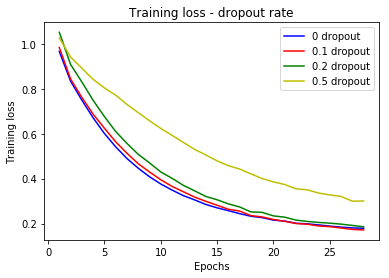

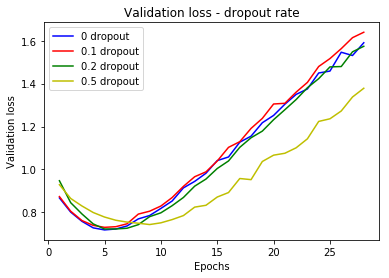

In [77]:
# Plotting the results for all dropout rates trained.
labels_list = ['0 dropout','0.1 dropout','0.2 dropout','0.5 dropout']
plot_models(train_loss_dropout, labels_list, "Training loss", "Training loss - dropout rate")
plot_models(val_loss_dropout, labels_list, "Validation loss", "Validation loss - dropout rate")

Looking at the results, where the models have a 0.5 dropout, overfitting seems to happen at a lower rate. However the minimum loss value does not appear to go as low as models with a lower dropout rate. In this plot it appears as if the 0, 0.1 and 0.2 dropout rate models have a similar pattern. This may be due to the number of epochs making it harder to see the difference in the lines at the first few number of epochs. With this in mind I will retrain on just 7 epochs to look more closely.

In [78]:
# Lets try the same experiment on just 7 epoch to examine the curve in that area more closely.
test_dropout(20, 2, dropout, 7)
train_loss_dropout7 = train_loss_list
val_loss_dropout7 = val_loss_list

Training with dropout:  0
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with dropout:  0.1
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with dropout:  0.2
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with dropout:  0.5
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


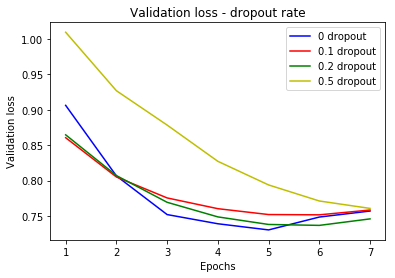

In [79]:
# Plotting the results.
labels_list = ['0 dropout','0.1 dropout','0.2 dropout','0.5 dropout']
plot_models(val_loss_dropout7, labels_list, "Validation loss", "Validation loss - dropout rate")

This plots give us much more insight into the overfitting happening in the first set of epochs. It is interesting to see that although the models with no dropout reach the lowest validation loss, as the dropout rate increase in future models we see the curves smooth out and overfitting begins later and less sharply. In fact at 0.5 dropout, the model performs worst in terms of validation loss but overfits much less than the other sets of models.

In [95]:
# Collecting the loss metrics.
dropout_loss_scores = [0.7223395218720308, 0.7301147843266392, 0.7224057055808403, 0.7430859356313139]
# Checking where overfitting begins for 0.5 dropout rate.
print(np.argmin(val_loss_dropout[3]) + 1)

9


##### Build new model to predict on test set.

I will now build a new models using the dropout rate 0.5. Even though the models with this dropout rate performed the worst in terms of validation loss, the curve was smoother and overfitting occured at a much slower rate. This leads me to believe that it will yield a better performance on the test set. At 0.5 dropout, the model started to overfit at 9 epochs so I will run this model on 9 epochs. This model will then be used to evaluate and collect results from the test set.

In [96]:
# Building new models on optimum chosen dropout rate.
model_dropout = build_model(20,2,0.5)
model_fit(model_dropout, x_train, y_train ,x_val, y_val, 9, 512)

In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


In [97]:
# Returns the loss value & metrics values for the model in test mode.
test_results_dropout = model_dropout.evaluate(x_test, y_test)
print(test_results_dropout)

2775/2775 [==============================] - 1s 465us/step
[0.7817162378199466, 0.6720720721794678]


#### Apply L1 and L2 regulisation

In [98]:
# Function to build model with regulisation parameter.
def build_model_regulisation(neuron_num, layer_num, drop_num, Lval):
    model = models.Sequential()
    model.add(layers.Dense(neuron_num, kernel_regularizer = Lval, activation = 'relu', input_shape = (7995,)))
    # Sets the correct number of layers as assigned above
    for x in range(0, layer_num):
        model.add(layers.Dense(neuron_num, kernel_regularizer = Lval, activation = 'relu'))
        model.add(layers.Dropout(drop_num))
    model.add(layers.Dense(3, activation = 'softmax'))
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [99]:
# Adding L1 and L2 regulisation specs respectively to regulisation variable.
regulisation = [regularizers.l1(0.001), regularizers.l2(0.001)]

# Function built to test the effect of L1 and L2 regulisation on model performance.
def test_regulisation(neuron_num, layer_num, dropout, regulisation, epoch):
    global val_loss_list, train_loss_list, val_acc_list, train_acc_list
    val_loss_list = []
    train_loss_list = []
    val_acc_list = []
    train_acc_list = []
    for i in range(len(regulisation)):
        print("Training with regulisation: ", regulisation[i])
        mod = build_model_regulisation(neuron_num, layer_num, dropout, regulisation[i])
        model_fit(mod, x_train, y_train ,x_val, y_val, epoch, 512)
        val_loss_list.append(val_loss)
        train_loss_list.append(loss)
        val_acc_list.append(val_acc)
        train_acc_list.append(acc)

In [100]:
# Calling the above function to fit models on the set parameters.
test_regulisation(20, 2, 0, regulisation, 28)
# Assigning the loss and accuracy metrics to variables for reporting.
train_loss_regul = train_loss_list
val_loss_regul = val_loss_list
val_acc_regul = val_acc_list
train_acc_regul = train_acc_list

Training with regulisation:  <keras.regularizers.L1L2 object at 0x1a7e4aa390>
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with regulisation:  <keras.regularizers.L1L2 object at 0x1a7e4aa3c8>
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


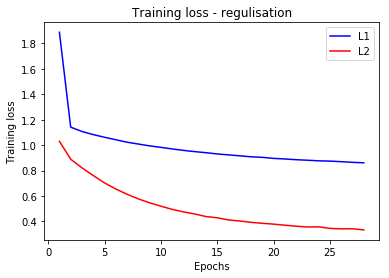

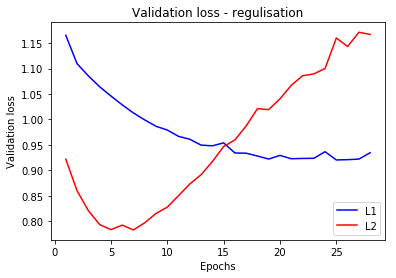

In [117]:
# Plotting the results for all dropout rates trained.
labels_list = ['L1','L2']
plot_models(train_loss_regul, labels_list, "Training loss", "Training loss - regulisation")
plot_models(val_loss_regul, labels_list, "Validation loss", "Validation loss - regulisation")

It is interesting to see that L2 acheives a much lower minumum loss value but overfits quite quickly. Whereas L1 does not get near the same minimum but also doesn't seem to show clear signs of overfitting.

In [111]:
# Collecting the loss metrics.
regulisation_loss_scores = [0.920837802607734, 0.7966479074847591]
# Checking where overfitting begins for L1 and L2.
print("L1: ", np.argmin(val_loss_regul[0]) + 1)
print("L2: ",np.argmin(val_loss_regul[1]) + 1)

L1:  25
L2:  7


##### Build new models to predict on test set.

I will now build new models using L1 and L2 regulisation. As with previous tests I will set the number of epochs to where the model started to overfit. These model will then be used to evaluate and collect results from the test set.

In [112]:
# Building new models using L1 and L2.
model_L1 = build_model_regulisation(20,2,0, regularizers.l1(0.001)) # L1
model_fit(model_L1, x_train, y_train ,x_val, y_val, 25, 512)
model_L2 = build_model_regulisation(20,2,0, regularizers.l2(0.001)) # L2
model_fit(model_L2, x_train, y_train ,x_val, y_val, 7, 512)

In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


In [113]:
# Returns the loss value & metrics values for the models in test mode.
test_results_L1 = model_L1.evaluate(x_test, y_test)
test_results_L2 = model_L2.evaluate(x_test, y_test)
print("L1: ", test_results_L1)
print("L1: ", test_results_L2)

2775/2775 [==============================] - 1s 478us/step
L1:  [0.9144717878693933, 0.6843243244317201]
L1:  [0.7950513233794823, 0.681801801823281]


#### Part 3: Learning rate

In [114]:
# Function to build model with regulisation parameter.
def build_model_lr(neuron_num, layer_num, drop_num, lrate):
    model = models.Sequential()
    model.add(layers.Dense(neuron_num, activation = 'relu', input_shape = (7995,)))
    # For loop to build model with number of layers assigned above.
    for x in range(0, layer_num):
        model.add(layers.Dense(neuron_num, activation = 'relu'))
        model.add(layers.Dropout(drop_num))
    model.add(layers.Dense(3, activation = 'softmax'))
    model.compile(optimizer = optimizers.RMSprop(lr = lrate), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [115]:
# Learning rate values to test.
lrate = [0.0005, 0.001, 0.002, 0.004]

# Function built to test the effect of change the learning rate on model performance.
def test_lr(neuron_num, layer_num, dropout, lrate):
    # Global variables to use outside of the function.
    global val_loss_list, train_loss_list, val_acc_list, train_acc_list
    val_loss_list = []
    train_loss_list = []
    val_acc_list = []
    train_acc_list = []
    # For loop to fit a new model for each learning rate on each epoch value.
    for i in range(len(lrate)):
        print("Training with learning rate: ", lrate[i])
        mod = build_model_lr(neuron_num, layer_num, dropout, lrate[i])
        model_fit(mod, x_train, y_train ,x_val, y_val, 28, 512)
        # Append loss and accuracy to assigned list for reporting.
        val_loss_list.append(val_loss)
        train_loss_list.append(loss)
        val_acc_list.append(val_acc)
        train_acc_list.append(acc)

In [116]:
# Calling the above function to fit models using the set parameters and variations of learning rate.
test_lr(20, 2, 0, lrate)
# Assigning the metric values to variables for reporting.
train_loss_lr = train_loss_list
val_loss_lr = val_loss_list
val_acc_lr = val_acc_list
train_acc_lr = train_acc_list

Training with learning rate:  0.0005
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with learning rate:  0.001
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with learning rate:  0.002
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.
Training with learning rate:  0.004
In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


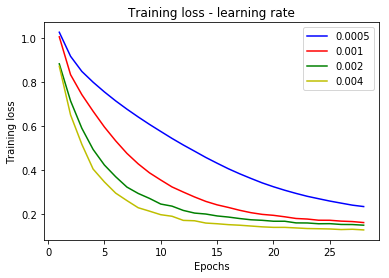

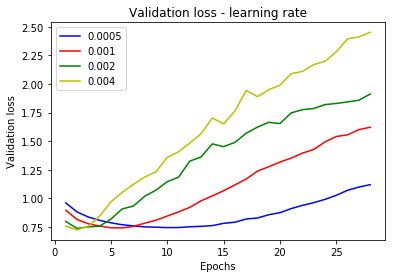

In [118]:
# Plotting the results for all dropout rates trained.
labels_list = ['0.0005','0.001','0.002','0.004']
plot_models(train_loss_lr, labels_list, "Training loss", "Training loss - learning rate")
plot_models(val_loss_lr, labels_list, "Validation loss", "Validation loss - learning rate")

This test has proved to have the biggest effect on the validation loss performance. Looking at the chart above you can see that as the learning rate is reduced, the models overfit much slower and the lines smooth out showing a more consistent performance.

In [127]:
# Collecting the loss metrics.
lr_loss_scores = [0.7453519408767287, 0.7427598550512984, 0.7378050813803801, 0.7251482300930195]
# Checking where overfitting begins different learning rate tests.
print("0.0005: ", np.argmin(val_loss_lr[0]) + 1)
print("0.001: ",np.argmin(val_loss_lr[1]) + 1)
print("0.002: ",np.argmin(val_loss_lr[2]) + 1)
print("0.004: ",np.argmin(val_loss_lr[3]) + 1)

0.0005:  10
0.001:  6
0.002:  2
0.004:  2


##### Build new model to predict on test set.

I will now build a new model using the 0.0005 learning rate. In the same arguement as the dropout rate, although the models with this learning rate had the highest minimum validation loss, the overfitting was greatly reduced so I believe it will provide improvement to test set performance. As with previous tests I will set the number of epochs to where the model started to overfit. These model will then be used to evaluate and collect results from the test set.

In [128]:
# Building new models using L1 and L2.
model_lr = build_model_lr(20,2,0, 0.0005) # L1
model_fit(model_lr, x_train, y_train ,x_val, y_val, 10, 512)

In progress: Model fitting to train and testing on validation.
Finished. Model trained, and tested on the validation set.


In [140]:
# Returns the loss value & metrics values for the models in test mode.
test_results_lr = model_lr.evaluate(x_test, y_test)
print("0.0005 lr: ", test_results_lr)

2775/2775 [==============================] - 1s 474us/step
0.0005 lr:  [0.7206701238520511, 0.6936936937151729]


## Report results

In the table below I have inputed the metrics taken from the tests above. I have recorded the validation loss in each case to give a comparision to the test loss and accuracy. Its important to note that the epoch number is the number used on the test of each model and when training the below models I would keep to 28 epochs to make it a fair test.

| Test type | Validation loss | Test loss | Test accuracy | Layer number | Neurons per layer | epochs (test) | Dropout | Regulisaton | Learning rate |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Baseline | 0.744 | 0.759 | 0.674 | 2 | 5 | 12 | 0 | None | None |
| Scaling up | 0.724 | 0.725 | 0.693 | 2 | 20 | 5 | 0 | None | None |
| Scaling up | 0.750 | 0.770 | 0.673 | 4 | 20 | 5 | 0 | None | None |
| Scaling up | 0.775 | 0.777 | 0.673 | 8 | 40 | 2 | 0 | None | None |
| Scaling up | 0.770 | 0.811 | 0.628 | 16 | 40 | 2 | 0 | None | None |
| Regulise & tune | 0.743 | 0.782 | 0.672 | 2 | 20 | 9 | 0.5 | None | None |
| Regulise & tune | 0.920 | 0.914 | 0.684 | 2 | 20 | 25 | 0 | L1 | None |
| Regulise & tune | 0.797 | 0.795 | 0.682 | 2 | 20 | 7 | 0 | L2 | None |
| Regulise & tune | 0.745 | 0.721 | 0.694 | 2 | 20 | 10 | 0 | None | 0.0005 |

## Conclusion

Looking at the results it is clear that the best performning model on the test set is where the learning rate is reduced to 0.0005. However on the validation set the best performing model comes from the scaling up stage in the workflow where the number of layers were two and the number of neurons per layer was 20.

If I was to think about improving this project and had more time, I would definetely test out using different validation techniques to reduce the models over learning from the validation set. I would also be keen to use the grid search method on a few combinations of hyper-parameters. I can see that tuning the learning rate gave me the best improvement in my model performance, therefor I would like to try a larger number of learning rate values, potentially across a grid with L1 & L2 regulisation (which also gave me an improvement on the baseline model).

I would also be keen to try more advanced neural networks and compare the results to this analysis. The network I use in this project takes a tensor which represents words featured in the tweet but does not consider the order of those words as predictive. A recurrent neural network (RNN) could work much better as they take as their input the current input as well as what they have perceived previously in time.

From this project I can see that hyper-parameter tuning and model optimization have many different approaches and require alot of time and care to get the process right. I have also learnt that optimizing just based on the validation loss doesn't always yield the best results and that overfitting, the smoothness of the curve and many other factors should come into play.




You can find the original dataset <a href="https://www.kaggle.com/crowdflower/first-gop-debate-twitter-sentiment">here.</a>